In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from feature_engine.transformation import LogTransformer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_excel('ms_mx_my_m3_tsla_df.xlsx')

In [3]:
data.head()

,model,year,odometer,price,location,driveTrain,DAS,accident_history,paintJob,wheels,emi,zipCode,interior
0,Model S,2018,"36,438 mile odometer",53300,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",$824 /mo,85209,Cream Premium Interior
1,Model S,2018,"30,180 mile odometer",59200,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",$930 /mo,85209,Black Premium Interior
2,Model S,2018,"95,696 mile odometer",36100,"Scottsdale, AZ",100D Long Range All-Wheel Drive,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",$514 /mo,85209,Black Premium Interior
3,Model S,2018,"36,438 mile odometer",53300,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",$824 /mo,85251,Cream Premium Interior
4,Model S,2018,"30,180 mile odometer",59200,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",$930 /mo,85251,Black Premium Interior


In [7]:
data.columns

Index(['model', 'year', 'odometer', 'price', 'location', 'driveTrain', 'DAS',
       'accident_history', 'paintJob', 'wheels', 'emi', 'zipCode', 'interior'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   model             2090 non-null   object
 1   year              2090 non-null   int64 
 2   odometer          2090 non-null   object
 3   price             2090 non-null   int64 
 4   location          2042 non-null   object
 5   driveTrain        2043 non-null   object
 6   DAS               2090 non-null   object
 7   accident_history  2090 non-null   object
 8   paintJob          2090 non-null   object
 9   wheels            2090 non-null   object
 10  emi               2090 non-null   object
 11  zipCode           2090 non-null   int64 
 12  interior          2090 non-null   object
dtypes: int64(3), object(10)
memory usage: 212.4+ KB


In [12]:
data.isnull().any()

model               False
year                False
odometer            False
price               False
location             True
driveTrain           True
DAS                 False
accident_history    False
paintJob            False
wheels              False
emi                 False
zipCode             False
interior            False
dtype: bool

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2090.0,2020.233014,1.136774,2018.0,2020.0,2020.0,2021.0,2022.0
price,2090.0,45345.933014,11202.242613,26500.0,38200.0,43700.0,51700.0,86200.0
zipCode,2090.0,88660.855981,3928.472933,85209.0,85260.0,85704.0,91801.0,95403.0


## Converting of data types

In [4]:
data['year'] = data['year'].astype(str)

In [5]:
data['odometer'] = data['odometer'].str.replace('mile odometer', '').str.replace(',', '').astype(float)

In [6]:
data['state'] = data['location'].str.split(',').str[-1].str.strip()

In [7]:
data['dtrain'] = data['driveTrain'].str.split().str[-2:]

In [8]:
data['dtrain'] = data['dtrain'].str.join(' ')

In [9]:
data['dtrain'].value_counts()

All-Wheel Drive      1630
Rear-Wheel Drive      395
Drive Performance      18
Name: dtrain, dtype: int64

In [36]:
data

,model,year,odometer,price,location,driveTrain,DAS,accident_history,paintJob,wheels,emi,zipCode,interior,state,dtrain
0,Model S,2018,36438.0,53300,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",$824 /mo,85209,Cream Premium Interior,CA,All-Wheel Drive
1,Model S,2018,30180.0,59200,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",$930 /mo,85209,Black Premium Interior,CA,All-Wheel Drive
2,Model S,2018,95696.0,36100,"Scottsdale, AZ",100D Long Range All-Wheel Drive,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",$514 /mo,85209,Black Premium Interior,AZ,All-Wheel Drive
3,Model S,2018,36438.0,53300,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",$824 /mo,85251,Cream Premium Interior,CA,All-Wheel Drive
4,Model S,2018,30180.0,59200,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",$930 /mo,85251,Black Premium Interior,CA,All-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Model 3,2022,32735.0,41900,"DENVER, CO",Model 3 Long Range Dual Motor All-Wheel Drive,Enhanced Autopilot,No Reported Accidents/Damage,Pearl White Paint,18â€™â€™ Aero Wheels,$673 /mo,95403,All Black Premium Interior,CO,All-Wheel Drive
2086,Model 3,2022,4208.0,42000,"Jacksonville, FL",Model 3 Long Range Dual Motor All-Wheel Drive,Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,18â€™â€™ Aero Wheels,$674 /mo,95403,All Black Premium Interior,FL,All-Wheel Drive
2087,Model 3,2022,7949.0,43900,"Elk Grove Village, IL",Model 3 Long Range Dual Motor All-Wheel Drive,Autopilot,No Reported Accidents/Damage,Solid Black Paint,18â€™â€™ Aero Wheels,$709 /mo,95403,All Black Premium Interior,IL,All-Wheel Drive
2088,Model 3,2022,23193.0,45200,"Available to view in Lisle, IL",Model 3 Long Range Dual Motor All-Wheel Drive,Full Self-Driving Capability,No Reported Accidents/Damage,Pearl White Paint,18â€™â€™ Aero Wheels,$732 /mo,95403,All Black Premium Interior,IL,All-Wheel Drive


In [10]:
data['emi'] = data['emi'].str.replace('$', '').str.replace('/mo', '').str.replace(',', '').astype(float)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [11]:
data

,model,year,odometer,price,location,driveTrain,DAS,accident_history,paintJob,wheels,emi,zipCode,interior,state,dtrain
0,Model S,2018,36438.0,53300,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85209,Cream Premium Interior,CA,All-Wheel Drive
1,Model S,2018,30180.0,59200,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85209,Black Premium Interior,CA,All-Wheel Drive
2,Model S,2018,95696.0,36100,"Scottsdale, AZ",100D Long Range All-Wheel Drive,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",514.0,85209,Black Premium Interior,AZ,All-Wheel Drive
3,Model S,2018,36438.0,53300,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85251,Cream Premium Interior,CA,All-Wheel Drive
4,Model S,2018,30180.0,59200,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85251,Black Premium Interior,CA,All-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Model 3,2022,32735.0,41900,"DENVER, CO",Model 3 Long Range Dual Motor All-Wheel Drive,Enhanced Autopilot,No Reported Accidents/Damage,Pearl White Paint,18â€™â€™ Aero Wheels,673.0,95403,All Black Premium Interior,CO,All-Wheel Drive
2086,Model 3,2022,4208.0,42000,"Jacksonville, FL",Model 3 Long Range Dual Motor All-Wheel Drive,Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,18â€™â€™ Aero Wheels,674.0,95403,All Black Premium Interior,FL,All-Wheel Drive
2087,Model 3,2022,7949.0,43900,"Elk Grove Village, IL",Model 3 Long Range Dual Motor All-Wheel Drive,Autopilot,No Reported Accidents/Damage,Solid Black Paint,18â€™â€™ Aero Wheels,709.0,95403,All Black Premium Interior,IL,All-Wheel Drive
2088,Model 3,2022,23193.0,45200,"Available to view in Lisle, IL",Model 3 Long Range Dual Motor All-Wheel Drive,Full Self-Driving Capability,No Reported Accidents/Damage,Pearl White Paint,18â€™â€™ Aero Wheels,732.0,95403,All Black Premium Interior,IL,All-Wheel Drive


In [12]:
data['wheels'].value_counts()

19â€™â€™ Gemini Wheels                  467
18â€™â€™ Aero Wheels                    456
20â€™â€™ Induction Wheels               252
19'' Tempest Wheels                     206
20" Silver Wheels                       158
19â€™â€™ Sport Wheels                   129
19" Sonic Carbon Slipstream Wheels       95
21" Sonic Carbon Twin Turbine Wheels     91
19â€™â€™ Silver Wheels                   44
21" Arachnid Wheels                      43
21â€™â€™ Ãœberturbine Wheels             36
22" Onyx Black Wheels                    32
19" Silver Slipstream Wheels             20
20'' Cyberstream Wheels                  18
20'' Two-Tone Slipstream Wheels          11
20" Sonic Carbon Wheels                  10
20â€™â€™ Ãœberturbine Wheels              9
22'' Turbine Wheels                       7
19" Tempest Wheels                        4
21" Arachnid Wheel                        1
20â€™â€™ Performance Wheels               1
Name: wheels, dtype: int64

In [13]:
data.isnull().any()

model               False
year                False
odometer            False
price               False
location             True
driveTrain           True
DAS                 False
accident_history    False
paintJob            False
wheels              False
emi                 False
zipCode             False
interior            False
state                True
dtrain               True
dtype: bool

## Dealing with null values

In [14]:
data['state'].isnull().sum()

48

In [15]:
data['dtrain'].isnull().sum()

47

In [69]:
data['state'].mode()[0]

'CA'

In [16]:
data['state'].fillna(data['state'].mode()[0], inplace=True)

In [17]:
data['dtrain'].fillna(data['dtrain'].mode()[0], inplace=True)

In [18]:
cols_to_drop = ['location', 'driveTrain']

data = data.drop(cols_to_drop, axis=1)

In [73]:
data

,model,year,odometer,price,DAS,accident_history,paintJob,wheels,emi,zipCode,interior,state,dtrain
0,Model S,2018,36438.0,53300,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85209,Cream Premium Interior,CA,All-Wheel Drive
1,Model S,2018,30180.0,59200,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85209,Black Premium Interior,CA,All-Wheel Drive
2,Model S,2018,95696.0,36100,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",514.0,85209,Black Premium Interior,AZ,All-Wheel Drive
3,Model S,2018,36438.0,53300,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85251,Cream Premium Interior,CA,All-Wheel Drive
4,Model S,2018,30180.0,59200,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85251,Black Premium Interior,CA,All-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Model 3,2022,32735.0,41900,Enhanced Autopilot,No Reported Accidents/Damage,Pearl White Paint,18â€™â€™ Aero Wheels,673.0,95403,All Black Premium Interior,CO,All-Wheel Drive
2086,Model 3,2022,4208.0,42000,Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,18â€™â€™ Aero Wheels,674.0,95403,All Black Premium Interior,FL,All-Wheel Drive
2087,Model 3,2022,7949.0,43900,Autopilot,No Reported Accidents/Damage,Solid Black Paint,18â€™â€™ Aero Wheels,709.0,95403,All Black Premium Interior,IL,All-Wheel Drive
2088,Model 3,2022,23193.0,45200,Full Self-Driving Capability,No Reported Accidents/Damage,Pearl White Paint,18â€™â€™ Aero Wheels,732.0,95403,All Black Premium Interior,IL,All-Wheel Drive


In [19]:
data['wheels'] = data['wheels'].str.replace('â€™â€™', '"')


data['wheels'] = data['wheels'].str.replace('Ãœ', 'Aero')

data['wheels'] = data['wheels'].str.replace("20''", '20"', regex=False)
data['wheels'] = data['wheels'].str.replace("22''", '22"', regex=False)
data['wheels'] = data['wheels'].str.replace("19''", '19"', regex=False)

In [20]:
data

,model,year,odometer,price,DAS,accident_history,paintJob,wheels,emi,zipCode,interior,state,dtrain
0,Model S,2018,36438.0,53300,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85209,Cream Premium Interior,CA,All-Wheel Drive
1,Model S,2018,30180.0,59200,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85209,Black Premium Interior,CA,All-Wheel Drive
2,Model S,2018,95696.0,36100,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",514.0,85209,Black Premium Interior,AZ,All-Wheel Drive
3,Model S,2018,36438.0,53300,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85251,Cream Premium Interior,CA,All-Wheel Drive
4,Model S,2018,30180.0,59200,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85251,Black Premium Interior,CA,All-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Model 3,2022,32735.0,41900,Enhanced Autopilot,No Reported Accidents/Damage,Pearl White Paint,"18"" Aero Wheels",673.0,95403,All Black Premium Interior,CO,All-Wheel Drive
2086,Model 3,2022,4208.0,42000,Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"18"" Aero Wheels",674.0,95403,All Black Premium Interior,FL,All-Wheel Drive
2087,Model 3,2022,7949.0,43900,Autopilot,No Reported Accidents/Damage,Solid Black Paint,"18"" Aero Wheels",709.0,95403,All Black Premium Interior,IL,All-Wheel Drive
2088,Model 3,2022,23193.0,45200,Full Self-Driving Capability,No Reported Accidents/Damage,Pearl White Paint,"18"" Aero Wheels",732.0,95403,All Black Premium Interior,IL,All-Wheel Drive


In [21]:
duplicates = data.duplicated()

print(duplicates.any())

print(data[duplicates])

True
        model  year  odometer  price                 DAS  \
98    Model S  2020   41391.0  47300           Autopilot   
114   Model S  2020   36925.0  53100           Autopilot   
137   Model S  2020   16994.0  58800  Enhanced Autopilot   
154   Model S  2020   41391.0  47300           Autopilot   
171   Model S  2020   36925.0  53100           Autopilot   
...       ...   ...       ...    ...                 ...   
1389  Model Y  2021   25081.0  42500           Autopilot   
1390  Model Y  2021   13319.0  43000  Enhanced Autopilot   
1760  Model 3  2020   33596.0  30800  Enhanced Autopilot   
1958  Model 3  2022    1036.0  38600  Enhanced Autopilot   
2081  Model 3  2022    1036.0  38600  Enhanced Autopilot   

                  accident_history                        paintJob  \
98    No Reported Accidents/Damage               Solid Black Paint   
114   No Reported Accidents/Damage              Deep Blue Metallic   
137   No Reported Accidents/Damage  Midnight Silver Metallic Pai

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             2090 non-null   object 
 1   year              2090 non-null   object 
 2   odometer          2090 non-null   float64
 3   price             2090 non-null   int64  
 4   DAS               2090 non-null   object 
 5   accident_history  2090 non-null   object 
 6   paintJob          2090 non-null   object 
 7   wheels            2090 non-null   object 
 8   emi               2090 non-null   float64
 9   zipCode           2090 non-null   int64  
 10  interior          2090 non-null   object 
 11  state             2090 non-null   object 
 12  dtrain            2090 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 212.4+ KB


In [23]:
categorical = [var for var in data.columns if data[var].dtype.name == 'object']

discrete = [var for var in data.columns if data[var].dtype.name != 'object' and len(data[var].unique()) < 20]

continuous = [var for var in data.columns if data[var].dtype.name != 'object' and var not in discrete]

In [80]:
categorical

['model',
 'year',
 'DAS',
 'accident_history',
 'paintJob',
 'wheels',
 'interior',
 'state',
 'dtrain']

In [81]:
continuous

['odometer', 'price', 'emi']

In [82]:
discrete

['zipCode']

In [24]:
def check_rare_categories(df, var):

    frequencies = 100 * df[var].value_counts(normalize=True)

    fig = frequencies.sort_values(ascending=False).plot.bar()

    fig.axhline(y=5, color='red')

    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    plt.show()

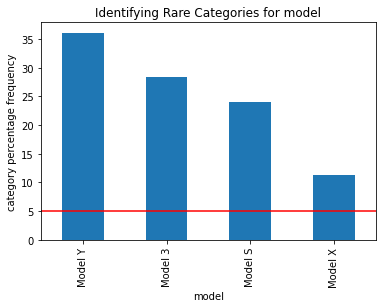

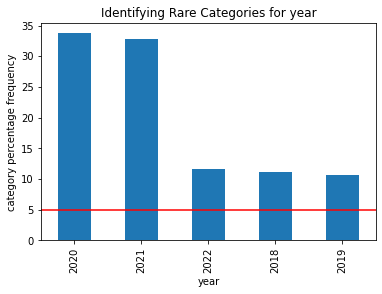

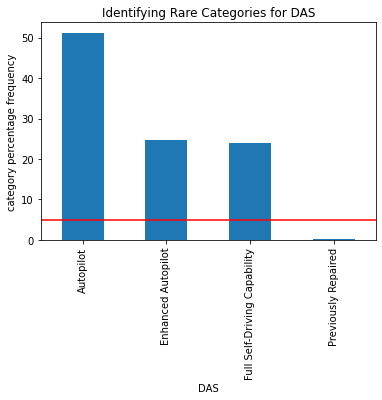

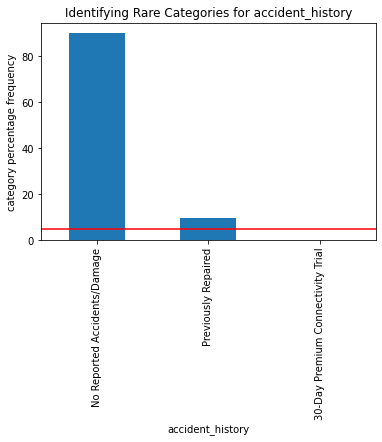

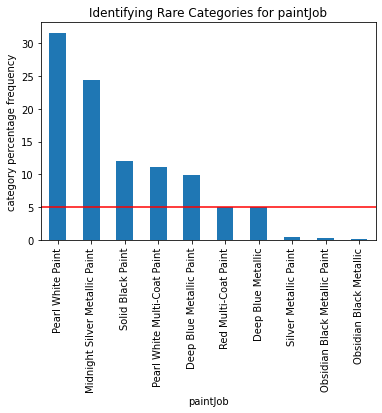

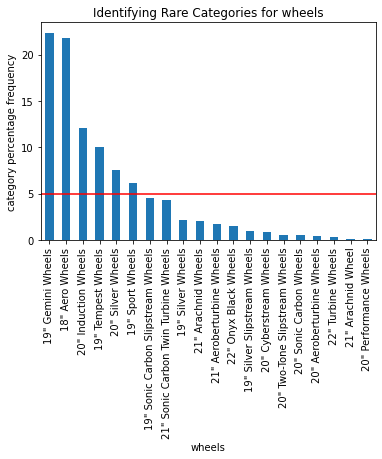

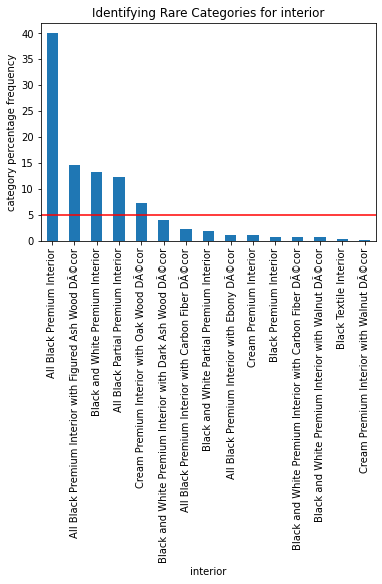

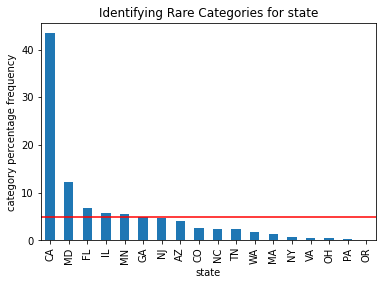

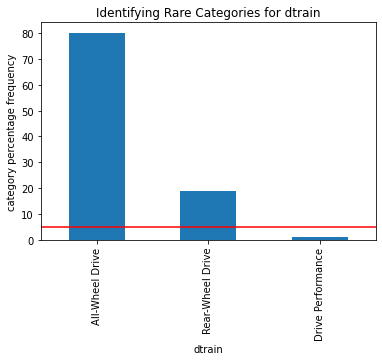

In [25]:
for var in categorical:
  check_rare_categories(data, var)

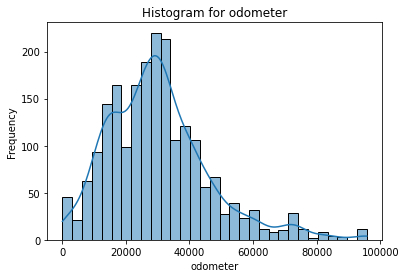

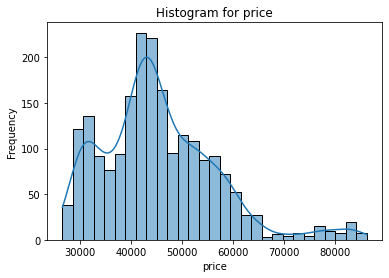

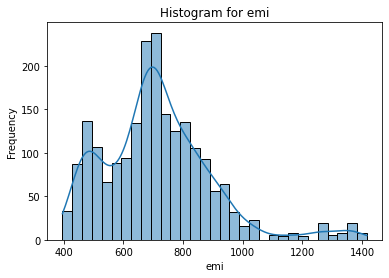

In [26]:
for var in continuous:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.histplot(data=data, x=var, kde=True)  # Create a histogram with a kernel density estimate
    plt.title(f'Histogram for {var}')  # Set the title
    plt.xlabel(var)  # Set the x-axis label
    plt.ylabel("Frequency")  # Set the y-axis label
    plt.show()

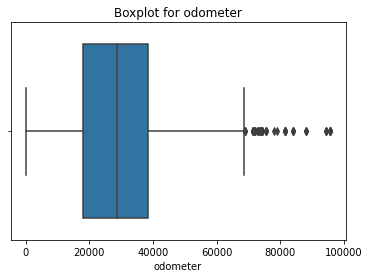

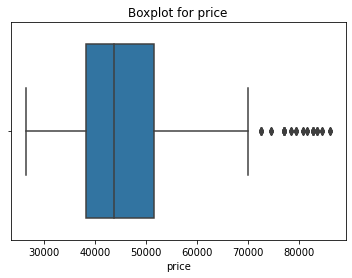

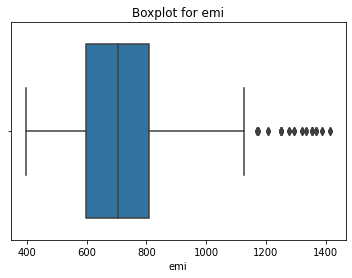

In [27]:
for var in continuous:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.boxplot(data=data, x=var)  # Create a boxplot
    plt.title(f'Boxplot for {var}')  # Set the title
    plt.xlabel(var)  # Set the x-axis label
    plt.show()

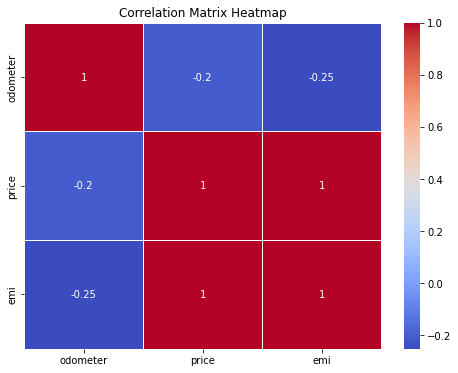

In [28]:
correlation_matrix = data[continuous].corr()


plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')  

plt.show()

In [91]:
data

,model,year,odometer,price,DAS,accident_history,paintJob,wheels,emi,zipCode,interior,state,dtrain
0,Model S,2018,36438.0,53300,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85209,Cream Premium Interior,CA,All-Wheel Drive
1,Model S,2018,30180.0,59200,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85209,Black Premium Interior,CA,All-Wheel Drive
2,Model S,2018,95696.0,36100,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",514.0,85209,Black Premium Interior,AZ,All-Wheel Drive
3,Model S,2018,36438.0,53300,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",824.0,85251,Cream Premium Interior,CA,All-Wheel Drive
4,Model S,2018,30180.0,59200,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",930.0,85251,Black Premium Interior,CA,All-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Model 3,2022,32735.0,41900,Enhanced Autopilot,No Reported Accidents/Damage,Pearl White Paint,"18"" Aero Wheels",673.0,95403,All Black Premium Interior,CO,All-Wheel Drive
2086,Model 3,2022,4208.0,42000,Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"18"" Aero Wheels",674.0,95403,All Black Premium Interior,FL,All-Wheel Drive
2087,Model 3,2022,7949.0,43900,Autopilot,No Reported Accidents/Damage,Solid Black Paint,"18"" Aero Wheels",709.0,95403,All Black Premium Interior,IL,All-Wheel Drive
2088,Model 3,2022,23193.0,45200,Full Self-Driving Capability,No Reported Accidents/Damage,Pearl White Paint,"18"" Aero Wheels",732.0,95403,All Black Premium Interior,IL,All-Wheel Drive


## Model Building and preprocessing

In [29]:
X = data[['model', 'year', 'odometer', 'DAS', 'accident_history', 'paintJob', 'wheels', 'interior', 'state', 'dtrain']]
y = data[['price']]

In [93]:
X

,model,year,odometer,DAS,accident_history,paintJob,wheels,interior,state,dtrain
0,Model S,2018,36438.0,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",Cream Premium Interior,CA,All-Wheel Drive
1,Model S,2018,30180.0,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",Black Premium Interior,CA,All-Wheel Drive
2,Model S,2018,95696.0,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",Black Premium Interior,AZ,All-Wheel Drive
3,Model S,2018,36438.0,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",Cream Premium Interior,CA,All-Wheel Drive
4,Model S,2018,30180.0,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",Black Premium Interior,CA,All-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...
2085,Model 3,2022,32735.0,Enhanced Autopilot,No Reported Accidents/Damage,Pearl White Paint,"18"" Aero Wheels",All Black Premium Interior,CO,All-Wheel Drive
2086,Model 3,2022,4208.0,Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"18"" Aero Wheels",All Black Premium Interior,FL,All-Wheel Drive
2087,Model 3,2022,7949.0,Autopilot,No Reported Accidents/Damage,Solid Black Paint,"18"" Aero Wheels",All Black Premium Interior,IL,All-Wheel Drive
2088,Model 3,2022,23193.0,Full Self-Driving Capability,No Reported Accidents/Damage,Pearl White Paint,"18"" Aero Wheels",All Black Premium Interior,IL,All-Wheel Drive


In [94]:
y

,price
0,53300
1,59200
2,36100
3,53300
4,59200
...,...
2085,41900
2086,42000
2087,43900
2088,45200


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')

Length of X_train: 1567
Length of X_test: 523


In [32]:
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of y_train: 1567
Length of y_test: 523


In [33]:
var_rare_labels = [
    'DAS',
    'accident_history',
    'paintJob',
    'wheels',
    'interior',
    'state',
    'dtrain'
]

In [34]:
continuous_var = ['odometer']

In [35]:
categorical_vars = ['model', 'year', 'DAS', 'accident_history', 'paintJob', 'wheels', 'interior', 'state', 'dtrain']

In [36]:
discrete

['zipCode']

## Making pipeline for model training and preprocessing steps

In [37]:
pipeline_1 = Pipeline([
    ('rare_label_encoder',
    RareLabelEncoder(tol=0.05, variables=var_rare_labels)),
    
    ('one_hot_encoder',
    OneHotEncoder(variables=categorical_vars, drop_last=True, ignore_format=True)),
    
    ('log_transformer',
    LogTransformer(variables=continuous_var)),
    
    ('scaler',
    SklearnTransformerWrapper(StandardScaler(), variables=continuous_var)),
    
    ('linearRegression',
    LinearRegression())
])

In [38]:
param_grid_1 = {
    'linearRegression__fit_intercept':[True, False]
}

grid_1 = GridSearchCV(pipeline_1, param_grid = param_grid_1, cv=5, return_train_score=True)

In [39]:
grid_1.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable DAS is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\Admin\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable accident_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\Admin\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable paintJob is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\Admin\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable dtra

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['DAS',
                                                                    'accident_history',
                                                                    'paintJob',
                                                                    'wheels',
                                                                    'interior',
                                                                    'state',
                                                                    'dtrain'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['model',
                                                                 'year', 'DAS',
   

In [40]:
grid_1.best_params_

{'linearRegression__fit_intercept': True}

In [41]:
grid_1.score(X_train, y_train) * 100

89.47815081301582

In [42]:
grid_1.best_score_ * 100

88.78963546526683

In [122]:
data.to_csv('tesla_used_cars_data_clean.csv', index=False)